In [1]:
import numpy as np
from scipy import signal,stats
import pykalman as pk

In [2]:
from matplotlib import pyplot as plt

In [32]:
t_max = 5

Ad = np.array([[0.999505,0.0098498],
              [-0.0984985,0.9699555]])

Bd = np.array([[0.0004950],
               [0.0984985]])

Cd = np.array([[1,0]])

Q = 2
R = 4
P00 = np.array([[100,0],
                [0,100]])
T = 0.01

f_u = 0.5
U_function = lambda x,f_u: np.sin(2*np.pi*f_u*x)



x_0  = np.array([[1],
                 [2]])

In [33]:
def x_step(x,u,Q,Ad,Bd):
    v = np.random.normal(loc=0.0, scale=Q)
    return(Ad@x+u*Bd+v)

def y_step(x,R,Cd):
    w = np.random.normal(loc=0.0, scale=R)
    return((Cd@x+w)[0])

def create_signal(x_0,R,Cd,Q,Ad,Bd,U_function,t_max,T,f_u):
    t = np.arange(0,t_max,T)
    n=len(t)
    Sx = [x_0]
    Sy = [y_step(x_0,R,Cd)]
    for i in range(n-1):
        u = U_function(t[i],f_u)
        x=Sx[-1]
        Sx.append(x_step(x,u,Q,Ad,Bd))
        Sy.append(y_step(x,R,Cd))
    return(t,np.array(Sx),np.array(Sy))

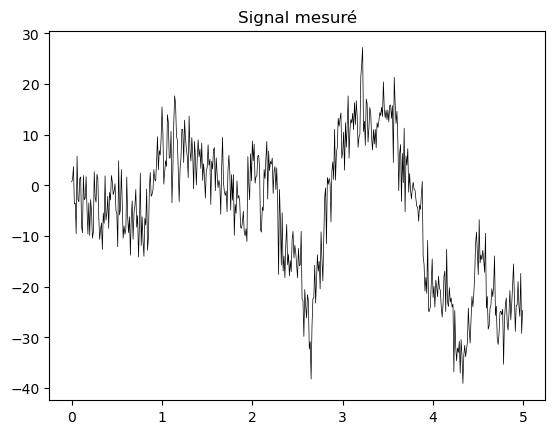

In [36]:
t,Sx,Sy = create_signal(x_0,R,Cd,Q,Ad,Bd,U_function,t_max,T,f_u)
plt.plot(t,Sy,color="black",linewidth= 0.5)
plt.title("Signal mesuré")
plt.show()


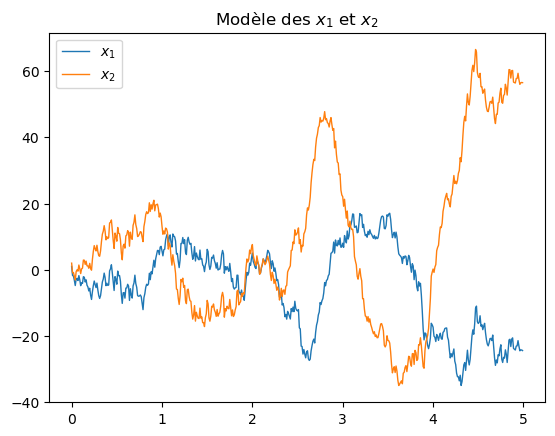

In [38]:
plt.title("Modèle des $x_1$ et $x_2$")
plt.plot(t,Sx.T[0][0],linewidth= 1,label = "$x_1$")
plt.plot(t,Sx.T[0][1],linewidth= 1,label = "$x_2$")
plt.legend()
plt.show()

# Filtre de Kalman

In [39]:
n_timesteps = len(t)
n_dim_obs = 1
n_dim_state = 2

In [40]:
kf = pk.KalmanFilter(transition_matrices=Ad,
                        observation_matrices=Cd,
                        transition_covariance=Q*np.eye(2),
                        observation_covariance=R*np.eye(1),
                        transition_offsets=np.transpose(Bd*U_function(t,f_u).T[:-1]),
                        initial_state_covariance=P00,
                        initial_state_mean = x_0.ravel(),
                        n_dim_obs=1)


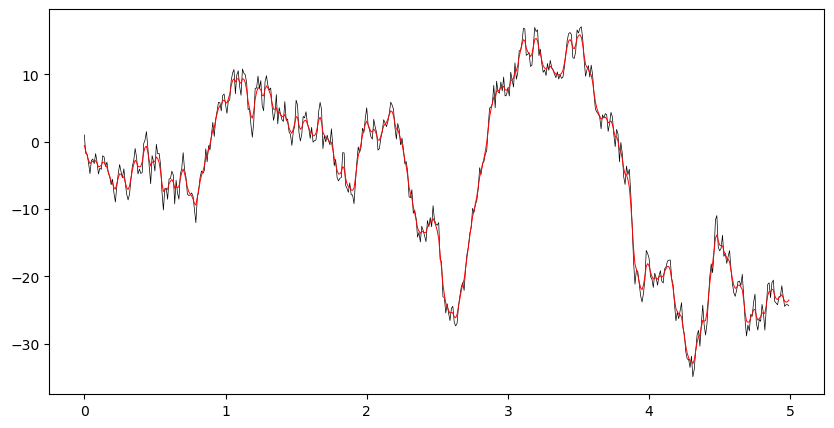

In [41]:
Sk = kf.smooth(Sx.T[0][0])
plt.figure(figsize=(10,5))
plt.plot(t,Sx.T[0][0],linewidth=0.5,color = "black")
plt.plot(t,Sk[0].T[0],linewidth=0.7,color = "red")
plt.show()

In [42]:
from plotly import express as px



fig = px.line(np.array([Sx.T[0][0].ravel(),Sk[0].T[0].ravel()]).T)
fig.show()